## Spam Mail Prediction


In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [299]:
# loading the data from csv file to a pandas Dataframe
df = pd.read_csv('F:/data science/mail_data.csv')

In [300]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [301]:
df.shape

(5572, 2)

In [302]:
df.nunique()

Category       2
Message     5157
dtype: int64

In [303]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [304]:
df.duplicated().sum()

415

In [305]:
df.drop_duplicates(inplace=True)


In [306]:
df.duplicated().sum()

0

In [307]:
df.shape

(5157, 2)

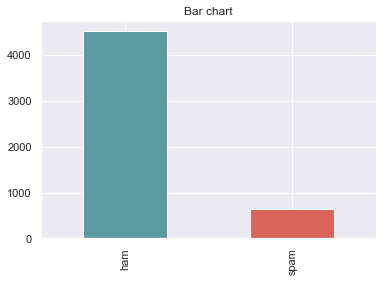

In [308]:
count_Class=pd.value_counts(df["Category"], sort= True)
count_Class.plot(kind= 'bar', color= ["#5b9aa0","#d96459"])
plt.title('Bar chart')
plt.show()

In [309]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [310]:
mail_data = df.where((pd.notnull(df)),'')

In [311]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [312]:
df.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


Text(0.5, 1.0, 'Pie chart')

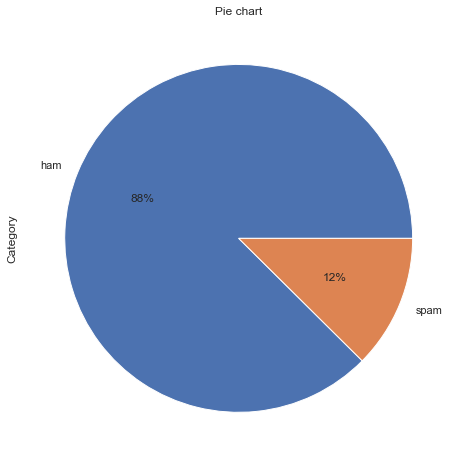

In [313]:
plt.figure(figsize = (8, 8))
df['Category'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Pie chart')

In [314]:
# label spam mail as 0;  ham mail as 1;
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

#### ML Model

In [315]:
# set inputs and outputs
X = mail_data['Message']
Y = mail_data['Category']

In [316]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [317]:
# checking the shape of the train and test datasets
print("The shape of x_train is: ",X_train.shape)
print("The shape of x_test is: ",X_test.shape)
print("The shape of y_train is: ",Y_train.shape)
print("The shape of y_test is: ",Y_test.shape)

The shape of x_train is:  (4125,)
The shape of x_test is:  (1032,)
The shape of y_train is:  (4125,)
The shape of y_test is:  (1032,)


In [318]:
''' CountVectorizer() is a useful tool for preprocessing text data and extracting features 
that can be used as input to machine learning models. ''' 
cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [319]:
#train the model 
model = SVC()
model.fit(X_train, Y_train)
#make prediction
y_pred = model.predict(X_test)


#### Model Performance Analysis

In [320]:
svm_cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', svm_cm)

print('\nTrue Positives(TP) = ', svm_cm[0,0])

print('\nTrue Negatives(TN) = ', svm_cm[1,1])

print('\nFalse Positives(FP) = ', svm_cm[0,1])

print('\nFalse Negatives(FN) = ', svm_cm[1,0])


Confusion matrix

 [[893   3]
 [ 16 120]]

True Positives(TP) =  893

True Negatives(TN) =  120

False Positives(FP) =  3

False Negatives(FN) =  16


<AxesSubplot:>

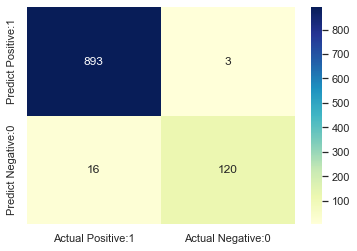

In [321]:
plt.figure(figsize=(6,4))

svm_cm = pd.DataFrame(data=svm_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='YlGnBu')

In [322]:
#Create a classification report for the model.
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.98      0.88      0.93       136

    accuracy                           0.98      1032
   macro avg       0.98      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



In [323]:
#Evaluate the model
print(f'Test accuracy: {model.score(X_test,Y_test)*100}')
print(f'Train accuracy: {model.score(X_train,Y_train)*100}')

Test accuracy: 98.15891472868216
Train accuracy: 99.53939393939393


#### Building a Predictive System


In [324]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = cv.transform(input_mail)

# making prediction
prediction = model.predict(input_data_features)
result = prediction[0]
if result == 'ham':
    result = 1
elif result == 'spam':
    result = 0

# print the result
print(result)

if (result==1):
    print('Ham mail')
else:
    print('Spam mail')

1
Ham mail
